In [2]:
"""
Dataset Summary & Descriptive Statistics

This script provides a detailed overview of the dataset, including:
- General summary statistics (mean, std, min, max, percentiles)
- Identification of numerical features
- Detection of highly skewed features
- Outlier detection based on quartiles
"""
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\S569652\\Documents\\INADS\\data\\Merged-Dataset-Final.csv"
df = pd.read_csv(file_path)

# Identify numeric columns (excluding non-numeric ones like "Timestamp" and "Label")
numeric_columns = df.select_dtypes(include=['number']).columns

# Generate summary statistics for numeric features
summary_statistics = df[numeric_columns].describe()

# Identify highly skewed features (absolute skewness > 1 indicates high skew)
skewness = df[numeric_columns].skew().abs().sort_values(ascending=False)

# Define outliers using Interquartile Range (IQR)
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()

# Display results
print("Summary Statistics:\n", summary_statistics)
print("\nSkewness of Numeric Features:\n", skewness)
print("\nOutliers Per Feature:\n", outliers)

Summary Statistics:
            Dst Port      Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
count  2.270317e+06  2.270317e+06   2.270317e+06  2.270317e+06  2.270317e+06   
mean   6.154646e+03  8.398626e+00   1.557901e+07  4.465864e+01  6.681058e+00   
std    1.565928e+04  4.672804e+00   3.166631e+07  2.328709e+03  2.272663e+02   
min    0.000000e+00  0.000000e+00   1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.000000e+01  6.000000e+00   9.430000e+02  2.000000e+00  0.000000e+00   
50%    8.000000e+01  6.000000e+00   1.122852e+06  2.000000e+00  1.000000e+00   
75%    4.450000e+02  6.000000e+00   8.998500e+06  3.000000e+00  4.000000e+00   
max    6.553400e+04  1.700000e+01   1.200000e+08  2.800430e+05  1.231180e+05   

       TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
count     2.270317e+06     2.270317e+06     2.270317e+06     2.270317e+06   
mean      1.667651e+03     5.548635e+03     1.370873e+02     1.007913e+01   
std       1.251020e+05     

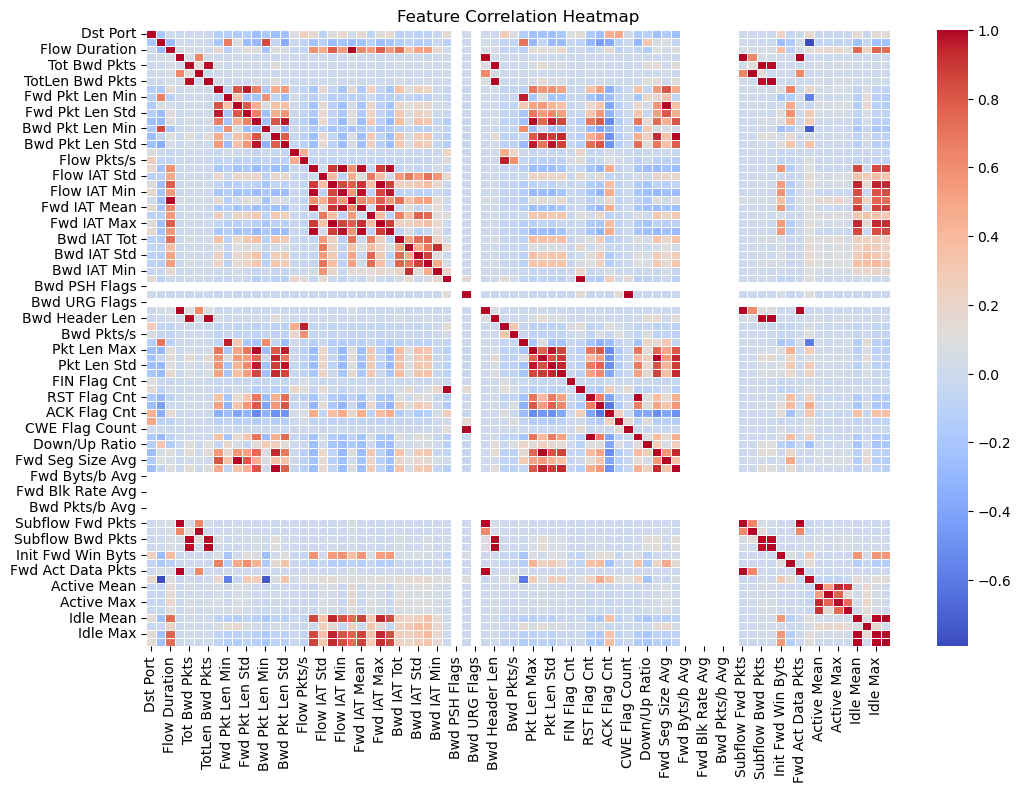

Dropped 33 highly correlated features.


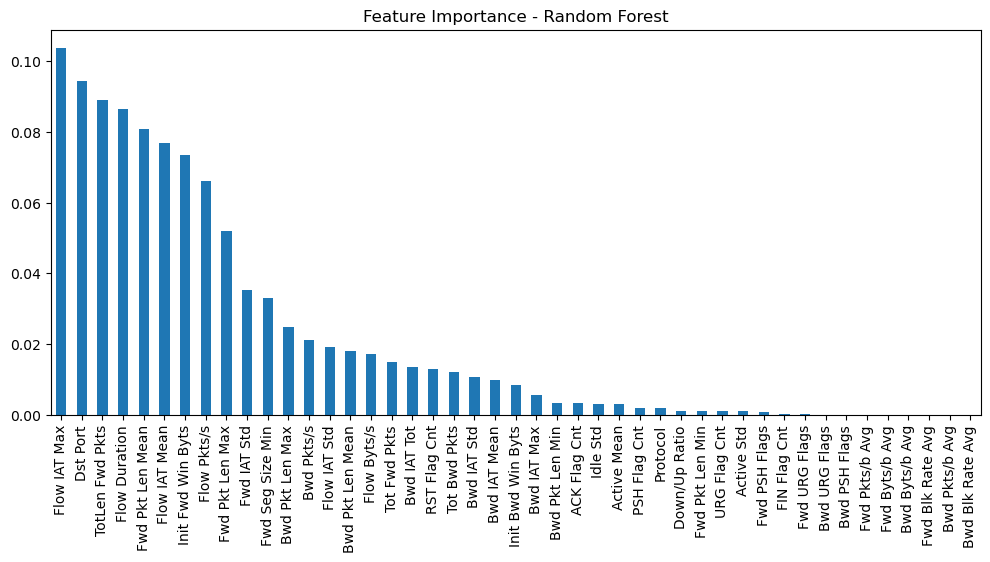

Selected 21 features after Random Forest importance analysis.


In [ ]:
""" 
This code systematically:
- Analyzes correlations and removes highly correlated features.
- Uses Random Forest to rank feature importance.
- Applies Recursive Feature Elimination (RFE) to select the most valuable features.
- Optionally applies PCA to reduce dimensions while preserving variance.
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "C:\\Users\\S569652\\Documents\\INADS\\data\\Merged-Dataset-Final.csv"
df = pd.read_csv(file_path)

# Drop non-numeric columns except 'Label'
df_numeric = df.select_dtypes(include=[np.number])
labels = df['Label']  # Preserve the labels separately

# Step 1: Correlation Analysis
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Identify highly correlated features (threshold > 0.9)
high_correlation_pairs = set()
thresh = 0.9
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > thresh:
            colname = correlation_matrix.columns[i]
            high_correlation_pairs.add(colname)

# Drop highly correlated features
df_selected = df_numeric.drop(columns=high_correlation_pairs)
print(f"Dropped {len(high_correlation_pairs)} highly correlated features.")

# Step 2: Feature Importance using Random Forest
X_train, X_test, y_train, y_test = train_test_split(df_selected, labels, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=df_selected.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))
plt.title("Feature Importance - Random Forest")
plt.show()

# Select features based on importance threshold
sfm = SelectFromModel(rf, threshold=0.01, prefit=True)
selected_features = df_selected.columns[sfm.get_support()]
print(f"Selected {len(selected_features)} features after Random Forest importance analysis.")

In [5]:
print(f"Current Features Retained: {df_selected.columns.tolist()}")
print(f"Total Features Retained: {len(df_selected.columns)}")


Current Features Retained: ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Std', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Bwd Pkts/s', 'FIN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'Down/Up Ratio', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Idle Std']
Total Features Retained: 45


In [6]:
# List of 21 previously selected features from Random Forest
selected_rf_features = selected_features.tolist()  

# Check if current dataset matches expected features
missing_features = [feature for feature in selected_rf_features if feature not in df_selected.columns]
extra_features = [feature for feature in df_selected.columns if feature not in selected_rf_features]

print(f"Missing Features: {missing_features}")
print(f"Unexpected Features Present: {extra_features}")


Missing Features: []
Unexpected Features Present: ['Protocol', 'Fwd Pkt Len Min', 'Bwd Pkt Len Min', 'Bwd IAT Mean', 'Bwd IAT Max', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'Down/Up Ratio', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Init Bwd Win Byts', 'Active Mean', 'Active Std', 'Idle Std']


In [7]:
print("Dataset Shape:", df_selected.shape)
print(df_selected.head())  # Display first few rows to confirm correct data


Dataset Shape: (2270317, 45)
   Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0     443.0       6.0        94658.0           6.0           7.0   
1     443.0       6.0          206.0           2.0           0.0   
2     445.0       6.0       165505.0           3.0           1.0   
3     443.0       6.0       102429.0           6.0           7.0   
4     443.0       6.0          167.0           2.0           0.0   

   TotLen Fwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0            708.0            387.0              0.0             118.0   
1              0.0              0.0              0.0               0.0   
2              0.0              0.0              0.0               0.0   
3            708.0            387.0              0.0             118.0   
4              0.0              0.0              0.0               0.0   

   Bwd Pkt Len Max  ...  Fwd Blk Rate Avg  Bwd Byts/b Avg  Bwd Pkts/b Avg  \
0           1460.0  ...               0.

In [9]:
# Ensure only the 21 selected features are retained
df_selected = df_selected[selected_rf_features]  # Keep only the selected RF features

# Verify the final feature set
print(f"Final Features Retained: {df_selected.columns.tolist()}")
print(f"Total Features Retained: {len(df_selected.columns)}")


Final Features Retained: ['Dst Port', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Std', 'Bwd IAT Tot', 'Bwd IAT Std', 'Bwd Pkts/s', 'RST Flag Cnt', 'Init Fwd Win Byts', 'Fwd Seg Size Min']
Total Features Retained: 21


In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load optimized feature set
df_selected = df[selected_features]  # The 21 selected features
labels = df["Label"]

# Use 50% of the dataset for RFE to preserve attack distributions
df_sample, _, labels_sample, _ = train_test_split(
    df_selected, labels, test_size=0.5, stratify=labels, random_state=42
)  

# Define RandomForest model with parallel processing enabled
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)  

# Apply RFE on 21 selected features
rfe = RFE(rf, n_features_to_select=15)  # Selecting top 15 most important features
rfe.fit(df_sample, labels_sample)

# Get selected features after RFE
selected_rfe_features = df_selected.columns[rfe.support_]

# Print results
print(f"Optimized RFE Completed - {len(selected_rfe_features)} features selected.")
print(f"Final Features after RFE: {list(selected_rfe_features)}")

Optimized RFE Completed - 15 features selected.
Final Features after RFE: ['Dst Port', 'Flow Duration', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Std', 'Bwd Pkts/s', 'Init Fwd Win Byts', 'Fwd Seg Size Min']


In [12]:
import pandas as pd

# Previously selected 21 features
previous_21_features = [
    'Dst Port', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
    'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean',
    'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
    'Fwd IAT Std', 'Bwd IAT Tot', 'Bwd IAT Std', 'Bwd Pkts/s', 'RST Flag Cnt',
    'Init Fwd Win Byts', 'Fwd Seg Size Min'
]

# Final 15 features after RFE
final_15_features = [
    'Dst Port', 'Flow Duration', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean',
    'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std',
    'Flow IAT Max', 'Fwd IAT Std', 'Bwd Pkts/s', 'Init Fwd Win Byts', 'Fwd Seg Size Min'
]

# Find dropped features
dropped_features = list(set(previous_21_features) - set(final_15_features))
retained_features = list(set(final_15_features) & set(previous_21_features))

print("Retained Features:", retained_features)
print("Dropped Features:", dropped_features)

Retained Features: ['Bwd Pkt Len Mean', 'Flow IAT Mean', 'Fwd Pkt Len Mean', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Flow Duration', 'Bwd Pkts/s', 'Flow Pkts/s', 'Fwd IAT Std', 'Flow Byts/s', 'Fwd Pkt Len Max', 'Flow IAT Max', 'Init Fwd Win Byts', 'Fwd Seg Size Min', 'Dst Port']
Dropped Features: ['Bwd IAT Tot', 'Bwd IAT Std', 'Tot Bwd Pkts', 'RST Flag Cnt', 'Tot Fwd Pkts', 'Bwd Pkt Len Max']


Loading dataset in chunks...

Class Distribution After Feature Selection:
                     Label    Count
0                  Benign  1573665
2  DDoS attacks-LOIC-HTTP   576175
1           Infilteration    68224
3   DoS attacks-GoldenEye    41455
4   DoS attacks-Slowloris    10285
5        Brute Force -Web      362
6        Brute Force -XSS      151


C:\Users\S569652\AppData\Local\Temp\ipykernel_14024\1168295317.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_df["Label"], y=class_counts_df["Count"], palette="viridis")


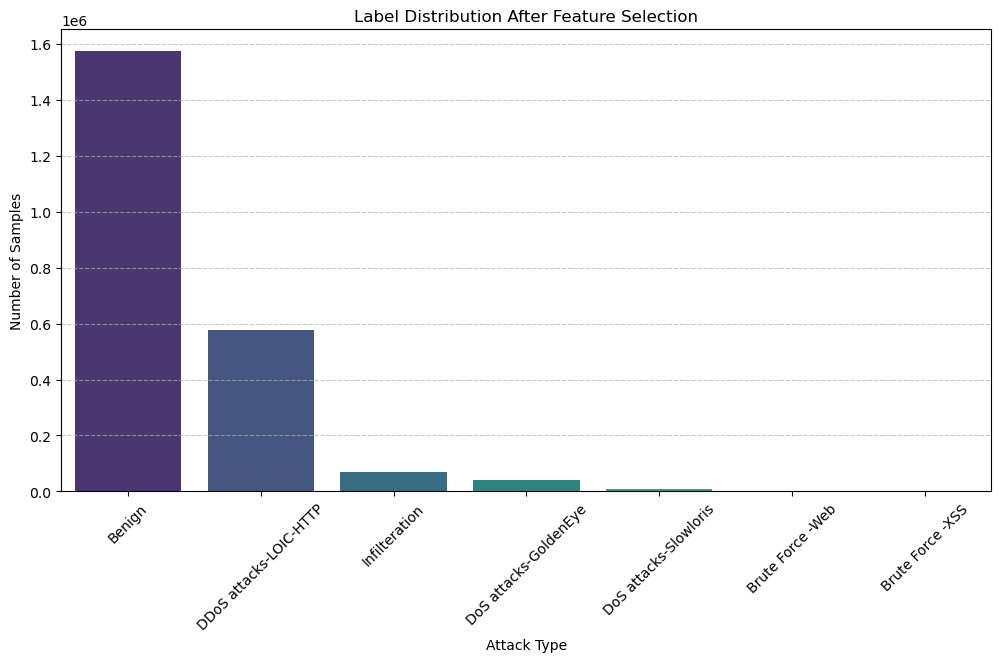


Process Completed Successfully!


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc

# Define file path
file_path = "C:\\Users\\S569652\\Documents\\INADS\\data\\Merged-Dataset-Final.csv"

# Selected features for processing
final_15_features = ['Dst Port', 'Flow Duration', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 
                     'Fwd Pkt Len Mean', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s', 
                     'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Std', 
                     'Bwd Pkts/s', 'Init Fwd Win Byts', 'Fwd Seg Size Min', 'Label']

# Load dataset in chunks to reduce memory usage
chunk_size = 500000  # Adjust based on system memory
class_counts = {}

print("Loading dataset in chunks...")
for chunk in pd.read_csv(file_path, usecols=final_15_features, chunksize=chunk_size):
    # Count occurrences of each class in the chunk
    for label, count in chunk['Label'].value_counts().items():
        class_counts[label] = class_counts.get(label, 0) + count

# Convert class counts to DataFrame
class_counts_df = pd.DataFrame(list(class_counts.items()), columns=["Label", "Count"])
class_counts_df = class_counts_df.sort_values(by="Count", ascending=False)

# Display class distribution
print("\nClass Distribution After Feature Selection:\n", class_counts_df)

# Plot class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts_df["Label"], y=class_counts_df["Count"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Label Distribution After Feature Selection")
plt.xlabel("Attack Type")
plt.ylabel("Number of Samples")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Free memory
gc.collect()
print("\nProcess Completed Successfully!")


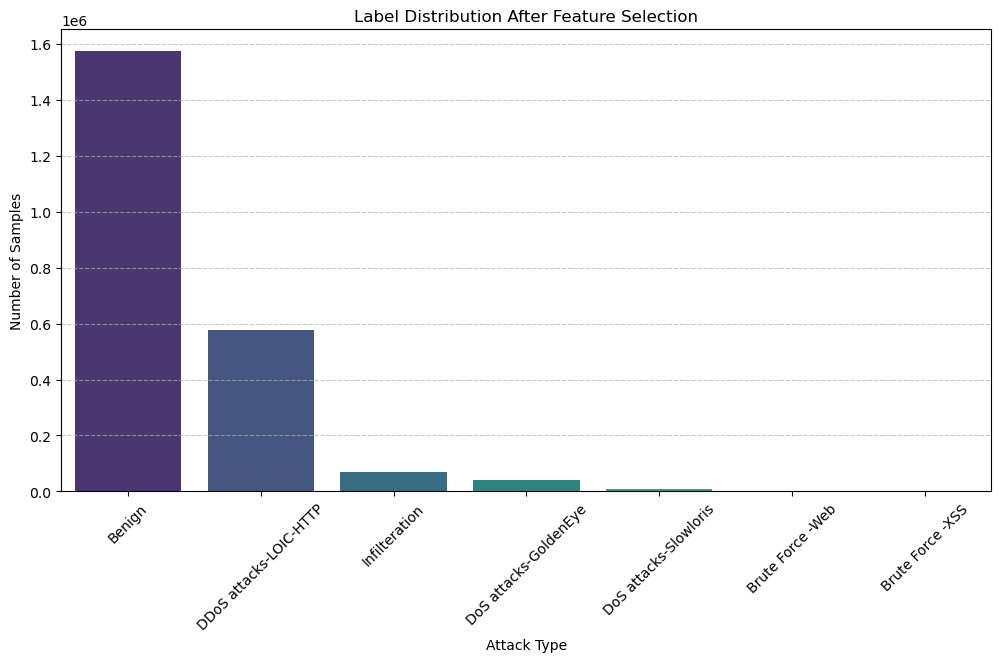

In [16]:
# Plot class distribution (Updated to avoid FutureWarning)
plt.figure(figsize=(12, 6))
sns.barplot(x="Label", y="Count", data=class_counts_df, hue="Label", dodge=False, palette="viridis")
plt.xticks(rotation=45)
plt.title("Label Distribution After Feature Selection")
plt.xlabel("Attack Type")
plt.ylabel("Number of Samples")
plt.legend([], [], frameon=False)  # Hide legend since hue is just for colors
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [19]:
#Basic sanity check before developing ML models
# Check for missing values
print("\nChecking for Missing Values:")
missing_values = df_selected.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found.")

# Check for duplicates
print(f"\nChecking for Duplicates: {df_selected.duplicated().sum()} duplicates found.")

# Verify data types
print("\nChecking Data Types:")
print(df_selected.dtypes)



Checking for Missing Values:
No missing values found.

Checking for Duplicates: 259806 duplicates found.

Checking Data Types:
Dst Port             float64
Flow Duration        float64
Tot Fwd Pkts         float64
Tot Bwd Pkts         float64
TotLen Fwd Pkts      float64
Fwd Pkt Len Max      float64
Fwd Pkt Len Mean     float64
Bwd Pkt Len Max      float64
Bwd Pkt Len Mean     float64
Flow Byts/s          float64
Flow Pkts/s          float64
Flow IAT Mean        float64
Flow IAT Std         float64
Flow IAT Max         float64
Fwd IAT Std          float64
Bwd IAT Tot          float64
Bwd IAT Std          float64
Bwd Pkts/s           float64
RST Flag Cnt         float64
Init Fwd Win Byts    float64
Fwd Seg Size Min     float64
dtype: object


In [2]:
#Regathering required data as the app was closed and lost df_selected data

import pandas as pd

# Load dataset
file_path = "C:\\Users\\S569652\\Documents\\INADS\\data\\Merged-Dataset-Final.csv"
df = pd.read_csv(file_path)

# Define selected 15 features
selected_features = [
    'Bwd Pkt Len Mean', 'Flow IAT Mean', 'Fwd Pkt Len Mean', 'Flow IAT Std', 'TotLen Fwd Pkts',
    'Flow Duration', 'Bwd Pkts/s', 'Flow Pkts/s', 'Fwd IAT Std', 'Flow Byts/s', 'Fwd Pkt Len Max',
    'Flow IAT Max', 'Init Fwd Win Byts', 'Fwd Seg Size Min', 'Dst Port'
]

# Keep only selected features and labels
df_selected = df[selected_features + ['Label']]

In [6]:
# Load dataset again and check for duplicates in the existing file as we already cleaned the data
import pandas as pd

# Load dataset
file_path = "C:\\Users\\S569652\\Documents\\INADS\\data\\Merged-Dataset-Final.csv"
df = pd.read_csv(file_path)

# Check duplicates before any processing
original_duplicates = df.duplicated().sum()
print(f"Total Duplicate Rows Before Feature Selection: {original_duplicates}")

Total Duplicate Rows Before Feature Selection: 0


In [7]:
# Select only the final 15 features
selected_features = [
    'Bwd Pkt Len Mean', 'Flow IAT Mean', 'Fwd Pkt Len Mean', 'Flow IAT Std', 'TotLen Fwd Pkts',
    'Flow Duration', 'Bwd Pkts/s', 'Flow Pkts/s', 'Fwd IAT Std', 'Flow Byts/s', 'Fwd Pkt Len Max',
    'Flow IAT Max', 'Init Fwd Win Byts', 'Fwd Seg Size Min', 'Dst Port'
]
df_selected = df[selected_features + ['Label']]

# Count duplicates after feature selection
new_duplicates = df_selected.duplicated().sum()
print(f"Total Duplicate Rows After Feature Selection: {new_duplicates}")

Total Duplicate Rows After Feature Selection: 250606


In [9]:
import pandas as pd

# Identify duplicate rows
duplicate_rows = df_selected[df_selected.duplicated(keep=False)]  # Keep all duplicate instances

# Count the number of duplicates per label
duplicate_label_distribution = duplicate_rows['Label'].value_counts()

# Count the label distribution in the full dataset
full_label_distribution = df_selected['Label'].value_counts()

# Display the results
print("Label Distribution Among Duplicates:\n", duplicate_label_distribution)
print("\nFull Label Distribution:\n", full_label_distribution)

# Compare proportion of duplicates in each class
duplicate_proportion = (duplicate_label_distribution / full_label_distribution) * 100
print("\nPercentage of Duplicates in Each Class:\n", duplicate_proportion)

Label Distribution Among Duplicates:
 Label
Benign                    307627
Infilteration              10311
DDoS attacks-LOIC-HTTP      1623
DoS attacks-Slowloris        613
DoS attacks-GoldenEye         98
Brute Force -Web              33
Brute Force -XSS               2
Name: count, dtype: int64

Full Label Distribution:
 Label
Benign                    1573665
DDoS attacks-LOIC-HTTP     576175
Infilteration               68224
DoS attacks-GoldenEye       41455
DoS attacks-Slowloris       10285
Brute Force -Web              362
Brute Force -XSS              151
Name: count, dtype: int64

Percentage of Duplicates in Each Class:
 Label
Benign                    19.548443
Brute Force -Web           9.116022
Brute Force -XSS           1.324503
DDoS attacks-LOIC-HTTP     0.281685
DoS attacks-GoldenEye      0.236401
DoS attacks-Slowloris      5.960136
Infilteration             15.113450
Name: count, dtype: float64


In [10]:
# Identify duplicate benign samples
benign_duplicates = df_selected[(df_selected.duplicated(keep='first')) & (df_selected['Label'] == 'Benign')]

# Remove benign duplicates while keeping attack duplicates
df_cleaned = df_selected.drop(benign_duplicates.index)

# Confirm changes
print(f"Final dataset shape after removing benign duplicates: {df_cleaned.shape}")
print(f"Total benign samples removed: {len(benign_duplicates)}")

Final dataset shape after removing benign duplicates: (2027871, 16)
Total benign samples removed: 242446


In [11]:
# Count remaining duplicates in the cleaned dataset
remaining_duplicates = df_selected.duplicated().sum()

# Display results
print(f"Remaining Duplicate Rows After Initial Removal: {remaining_duplicates}")

Remaining Duplicate Rows After Initial Removal: 250606


In [12]:
# Drop all exact duplicate rows based on selected 15 features
df_selected_cleaned = df_selected.drop_duplicates(keep='first')

# Check again for remaining duplicates
final_duplicates = df_selected_cleaned.duplicated().sum()

# Display results
print(f"Final Duplicate Rows After Full Deduplication: {final_duplicates}")
print(f"Final Dataset Shape After Removing All Duplicates: {df_selected_cleaned.shape}")

Final Duplicate Rows After Full Deduplication: 0
Final Dataset Shape After Removing All Duplicates: (2019711, 16)


In [2]:
#Final verification before ML model development 
import pandas as pd

# Load the dataset
file_path = r"C:\Users\S569652\Documents\INADS\data\Merged-Dataset-Final.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443.0,6.0,28/02/2018 08:22:13,94658.0,6.0,7.0,708.0,3718.0,387.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,443.0,6.0,28/02/2018 08:22:13,206.0,2.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,445.0,6.0,28/02/2018 08:22:15,165505.0,3.0,1.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443.0,6.0,28/02/2018 08:22:16,102429.0,6.0,7.0,708.0,3718.0,387.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443.0,6.0,28/02/2018 08:22:16,167.0,2.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [3]:
# Display column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2270317 entries, 0 to 2270316
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           float64
 1   Protocol           float64
 2   Timestamp          object 
 3   Flow Duration      float64
 4   Tot Fwd Pkts       float64
 5   Tot Bwd Pkts       float64
 6   TotLen Fwd Pkts    float64
 7   TotLen Bwd Pkts    float64
 8   Fwd Pkt Len Max    float64
 9   Fwd Pkt Len Min    float64
 10  Fwd Pkt Len Mean   float64
 11  Fwd Pkt Len Std    float64
 12  Bwd Pkt Len Max    float64
 13  Bwd Pkt Len Min    float64
 14  Bwd Pkt Len Mean   float64
 15  Bwd Pkt Len Std    float64
 16  Flow Byts/s        float64
 17  Flow Pkts/s        float64
 18  Flow IAT Mean      float64
 19  Flow IAT Std       float64
 20  Flow IAT Max       float64
 21  Flow IAT Min       float64
 22  Fwd IAT Tot        float64
 23  Fwd IAT Mean       float64
 24  Fwd IAT Std        float64
 25  Fwd IAT Max       

In [4]:
# Count missing values per column
df.isnull().sum()

Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64

In [5]:
# Count unique values in the 'Label' column
df["Label"].value_counts()

Label
Benign                    1573665
DDoS attacks-LOIC-HTTP     576175
Infilteration               68224
DoS attacks-GoldenEye       41455
DoS attacks-Slowloris       10285
Brute Force -Web              362
Brute Force -XSS              151
Name: count, dtype: int64

In [6]:
# Count total duplicate rows
df.duplicated().sum()

np.int64(0)

In [7]:
# Generate summary statistics for numerical features
df.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,...,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06
mean,6.154646e+03,8.398626e+00,1.557901e+07,4.465864e+01,6.681058e+00,1.667651e+03,5.548635e+03,1.370873e+02,1.007913e+01,3.623258e+01,...,4.103088e+01,1.754094e+01,1.372510e+05,6.317777e+04,2.093652e+05,9.571855e+04,8.651295e+06,1.723485e+05,8.824746e+06,8.491307e+06
std,1.565928e+04,4.672804e+00,3.166631e+07,2.328709e+03,2.272663e+02,1.251020e+05,3.155935e+05,2.492628e+02,2.709476e+01,5.425407e+01,...,2.327163e+03,6.033696e+00,1.955574e+06,1.141154e+06,2.604577e+06,1.664592e+06,2.042859e+07,1.769064e+06,2.066023e+07,2.035969e+07
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+01,6.000000e+00,9.430000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,6.000000e+00,1.122852e+06,2.000000e+00,1.000000e+00,3.100000e+01,9.700000e+01,3.100000e+01,0.000000e+00,1.900000e+01,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.450000e+02,6.000000e+00,8.998500e+06,3.000000e+00,4.000000e+00,1.100000e+02,9.640000e+02,9.700000e+01,0.000000e+00,4.800000e+01,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.308489e+06,0.000000e+00,5.324609e+06,5.125622e+06
max,6.553400e+04,1.700000e+01,1.200000e+08,2.800430e+05,1.231180e+05,1.443918e+08,1.563604e+08,1.002400e+04,1.460000e+03,2.946679e+03,...,2.800420e+05,4.800000e+01,1.131927e+08,7.495336e+07,1.131927e+08,1.131927e+08,1.199916e+08,7.157844e+07,1.199916e+08,1.199916e+08


In [8]:
"""
- Saving the determined 15 features in a Seperate CSV file for ML model training.
- 33 features dropped - highly correlated attributes above 0.9 using heatmap.
- 21 features retained - after random forest analysis on the dataset.
- 15 features finalised - after performing RFE on the 21 retained features.
"""
# Define the 15 selected features
selected_features = [
    "Bwd Pkt Len Mean", "Flow IAT Mean", "Fwd Pkt Len Mean", "Flow IAT Std", 
    "TotLen Fwd Pkts", "Flow Duration", "Bwd Pkts/s", "Flow Pkts/s", 
    "Fwd IAT Std", "Flow Byts/s", "Fwd Pkt Len Max", "Flow IAT Max", 
    "Init Fwd Win Byts", "Fwd Seg Size Min", "Dst Port"
]

# Ensure label is retained
selected_features.append("Label")

# Drop all other columns and keep only the selected features
df_selected = df[selected_features]

# Verify dataset structure
print("Final dataset shape:", df_selected.shape)
print("Remaining Columns:", df_selected.columns)

# Save the cleaned dataset for model training
df_selected.to_csv(r"C:\Users\S569652\Documents\INADS\data\feature_extraction.csv", index=False)

Final dataset shape: (2270317, 16)
Remaining Columns: Index(['Bwd Pkt Len Mean', 'Flow IAT Mean', 'Fwd Pkt Len Mean', 'Flow IAT Std',
       'TotLen Fwd Pkts', 'Flow Duration', 'Bwd Pkts/s', 'Flow Pkts/s',
       'Fwd IAT Std', 'Flow Byts/s', 'Fwd Pkt Len Max', 'Flow IAT Max',
       'Init Fwd Win Byts', 'Fwd Seg Size Min', 'Dst Port', 'Label'],
      dtype='object')


In [9]:
"""
Code: Feature Validation (Quality Check + Summary Stats)
Step 1: Load the final feature extraction dataset
- Verify dataset structure, missing values, and duplicates.
- Ensure all 15 selected features + Label are correctly formatted.
"""

import pandas as pd

# Load the dataset
file_path = r"C:\Users\S569652\Documents\INADS\data\feature_extraction.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)  # Should be (2,270,317, 16)
print("\nColumn Data Types:\n", df.dtypes)  # Ensure no errors in data types

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values Per Column:\n", missing_values[missing_values > 0])  # Should return empty if no missing values

# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\nTotal Duplicate Rows:", duplicates)  # Should be 0 if deduplication is successful

# Summary statistics of all features
print("\nFeature Summary Statistics:\n", df.describe())

# Save cleaned dataset if needed
df.to_csv(r"C:\Users\S569652\Documents\INADS\data\feature_extraction_validated.csv", index=False)

Dataset Shape: (2270317, 16)

Column Data Types:
 Bwd Pkt Len Mean     float64
Flow IAT Mean        float64
Fwd Pkt Len Mean     float64
Flow IAT Std         float64
TotLen Fwd Pkts      float64
Flow Duration        float64
Bwd Pkts/s           float64
Flow Pkts/s          float64
Fwd IAT Std          float64
Flow Byts/s          float64
Fwd Pkt Len Max      float64
Flow IAT Max         float64
Init Fwd Win Byts    float64
Fwd Seg Size Min     float64
Dst Port             float64
Label                 object
dtype: object

Missing Values Per Column:
 Series([], dtype: int64)

Total Duplicate Rows: 250606

Feature Summary Statistics:
        Bwd Pkt Len Mean  Flow IAT Mean  Fwd Pkt Len Mean  Flow IAT Std  \
count      2.270317e+06   2.270317e+06      2.270317e+06  2.270317e+06   
mean       1.219951e+02   7.541703e+06      3.623258e+01  9.784007e+05   
std        1.693769e+02   1.926080e+07      5.425407e+01  3.911250e+06   
min        0.000000e+00   3.333333e-01      0.000000e+00  0.00

In [10]:
"""
Step 2: List & Analyze Duplicate Rows Before Removing
- Identify duplicate rows and analyze their label distribution.
- Ensures we are not disproportionately removing attack samples.
"""

# Identify duplicate rows
duplicates = df[df.duplicated(keep=False)]  # keep=False lists ALL duplicates (not just first occurrence)

# Display first few duplicate rows
print("Total Duplicate Rows Found:", duplicates.shape[0])
print("\nSample of Duplicate Rows:")
print(duplicates.head())

# Analyze label distribution within duplicates
duplicate_labels = duplicates["Label"].value_counts()
print("\nLabel Distribution in Duplicate Rows:\n", duplicate_labels)

Total Duplicate Rows Found: 320307

Sample of Duplicate Rows:
    Bwd Pkt Len Mean  Flow IAT Mean  Fwd Pkt Len Mean  Flow IAT Std  \
1                0.0          206.0          0.000000      0.000000   
4                0.0          167.0          0.000000      0.000000   
9                0.0          201.0          0.000000      0.000000   
12               0.0          143.0          0.000000      0.000000   
14               0.0          128.5         10.333333    109.601551   

    TotLen Fwd Pkts  Flow Duration  Bwd Pkts/s   Flow Pkts/s  Fwd IAT Std  \
1               0.0          206.0         0.0   9708.737864     0.000000   
4               0.0          167.0         0.0  11976.047904     0.000000   
9               0.0          201.0         0.0   9950.248756     0.000000   
12              0.0          143.0         0.0  13986.013986     0.000000   
14             31.0          257.0         0.0  11673.151751   109.601551   

      Flow Byts/s  Fwd Pkt Len Max  Flow IAT Max

In [11]:
"""
Step 2A: Remove Only Benign Duplicates First
- This prevents biasing the dataset by keeping attack class samples intact.
- Ensures that benign class does not dominate the dataset unfairly.
"""

# Identify benign duplicates
benign_duplicates = df[(df.duplicated(keep="first")) & (df["Label"] == "Benign")]

# Remove only benign duplicates
df_cleaned = df.drop(benign_duplicates.index)

# Verify dataset shape after benign duplicate removal
print("Dataset Shape After Removing Benign Duplicates:", df_cleaned.shape)

# Save dataset after benign duplicate removal
df_cleaned.to_csv(r"C:\Users\S569652\Documents\INADS\data\feature_extraction_cleaned_step1.csv", index=False)

Dataset Shape After Removing Benign Duplicates: (2027871, 16)


In [12]:
"""
Step 2B: Analyze Remaining Duplicate Rows After Benign Removal
- Ensures no excessive removal of attack samples.
- Saves remaining duplicates for analysis before final cleanup.
"""

# Identify remaining duplicates
remaining_duplicates = df_cleaned[df_cleaned.duplicated(keep=False)]

# Display updated duplicate count
print("Remaining Duplicate Rows After Benign Removal:", remaining_duplicates.shape[0])

# Analyze label distribution in remaining duplicates
print("\nLabel Distribution in Remaining Duplicates:\n", remaining_duplicates["Label"].value_counts())



Remaining Duplicate Rows After Benign Removal: 12680

Label Distribution in Remaining Duplicates:
 Label
Infilteration             10311
DDoS attacks-LOIC-HTTP     1623
DoS attacks-Slowloris       613
DoS attacks-GoldenEye        98
Brute Force -Web             33
Brute Force -XSS              2
Name: count, dtype: int64


In [13]:
"""
Step 2C: Check How Much of Each Attack Class is Duplicated
- Ensures we do not accidentally remove too many rare attack samples.
- Helps in deciding whether to keep or partially remove duplicates.
"""

# Count total samples per attack class
attack_class_distribution = df_cleaned["Label"].value_counts()

# Compute percentage of duplicates per attack class
duplicate_percentage = (remaining_duplicates["Label"].value_counts() / attack_class_distribution) * 100

# Display the impact of duplicate removal
print("\nPercentage of Attack Samples That Are Duplicates:\n", duplicate_percentage)


Percentage of Attack Samples That Are Duplicates:
 Label
Benign                          NaN
Brute Force -Web           9.116022
Brute Force -XSS           1.324503
DDoS attacks-LOIC-HTTP     0.281685
DoS attacks-GoldenEye      0.236401
DoS attacks-Slowloris      5.960136
Infilteration             15.113450
Name: count, dtype: float64


In [14]:
"""
Step 2D: Remove 50% of Infilteration Duplicates
- Prevents over-representation of Infilteration attacks.
- Keeps all other attack classes intact to maintain balance.
"""

import numpy as np

# Identify duplicate rows for Infilteration
infilteration_duplicates = remaining_duplicates[remaining_duplicates["Label"] == "Infilteration"]

# Randomly select 50% of duplicates to remove
np.random.seed(42)  # For reproducibility
infilteration_to_remove = infilteration_duplicates.sample(frac=0.5)

# Drop selected duplicates from the dataset
df_final = df_cleaned.drop(infilteration_to_remove.index)

# Verify final dataset shape after controlled duplicate removal
print("Final Dataset Shape After Partial Duplicate Removal:", df_final.shape)

# Save cleaned dataset
df_final.to_csv(r"C:\Users\S569652\Documents\INADS\data\feature_extraction_final.csv", index=False)

Final Dataset Shape After Partial Duplicate Removal: (2022715, 16)


In [15]:
"""
Step 2E: Final Check After Duplicate Removal
- Ensures the final dataset is perfectly cleaned & balanced.
- Confirms attack class distribution before training.
"""

# Reload the final cleaned dataset
df_final = pd.read_csv(r"C:\Users\S569652\Documents\INADS\data\feature_extraction_final.csv")

# Check final label distribution
print("\nFinal Label Distribution:\n", df_final["Label"].value_counts())

# Save for reference
df_final.to_csv(r"C:\Users\S569652\Documents\INADS\data\feature_extraction_final.csv", index=False)


Final Label Distribution:
 Label
Benign                    1331219
DDoS attacks-LOIC-HTTP     576175
Infilteration               63068
DoS attacks-GoldenEye       41455
DoS attacks-Slowloris       10285
Brute Force -Web              362
Brute Force -XSS              151
Name: count, dtype: int64


In [17]:
!pip install shap

   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------ --------------------------------- 2.1/12.6 MB 11.7 MB/s eta 0:00:01
   ----------------- ---------------------- 5.5/12.6 MB 14.6 MB/s eta 0:00:01
   ----------------------------- ---------- 9.2/12.6 MB 15.4 MB/s eta 0:00:01
   ---------------------------------------  12.3/12.6 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 15.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.2
    Uninstalling numpy-2.2.2:
      Successfully uninstalled numpy-2.2.2


  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
"""
Step 1: Re-import Pandas and Reload Final Dataset
- This ensures the dataset is loaded correctly after kernel restart.
"""

import pandas as pd  # Re-import Pandas

# Load the final dataset
file_path = r"C:\Users\S569652\Documents\INADS\data\feature_extraction_final.csv"
df_final = pd.read_csv(file_path)

# Confirm dataset is loaded
print("Dataset loaded successfully. Shape:", df_final.shape)

Dataset loaded successfully. Shape: (2022715, 16)


Dataset successfully loaded. Shape: (2022715, 16)
Feature Matrix Shape: (2022715, 15), Label Vector Shape: (2022715,)

Feature Importance Ranking:
          Feature  Importance
         Dst Port    0.147413
  TotLen Fwd Pkts    0.122866
  Fwd Pkt Len Max    0.108576
     Flow IAT Max    0.105741
 Fwd Pkt Len Mean    0.082620
      Flow Pkts/s    0.077976
Init Fwd Win Byts    0.070899
    Flow Duration    0.069878
    Flow IAT Mean    0.060560
 Fwd Seg Size Min    0.040564
      Fwd IAT Std    0.036312
     Flow IAT Std    0.031641
       Bwd Pkts/s    0.020391
      Flow Byts/s    0.014961
 Bwd Pkt Len Mean    0.009602


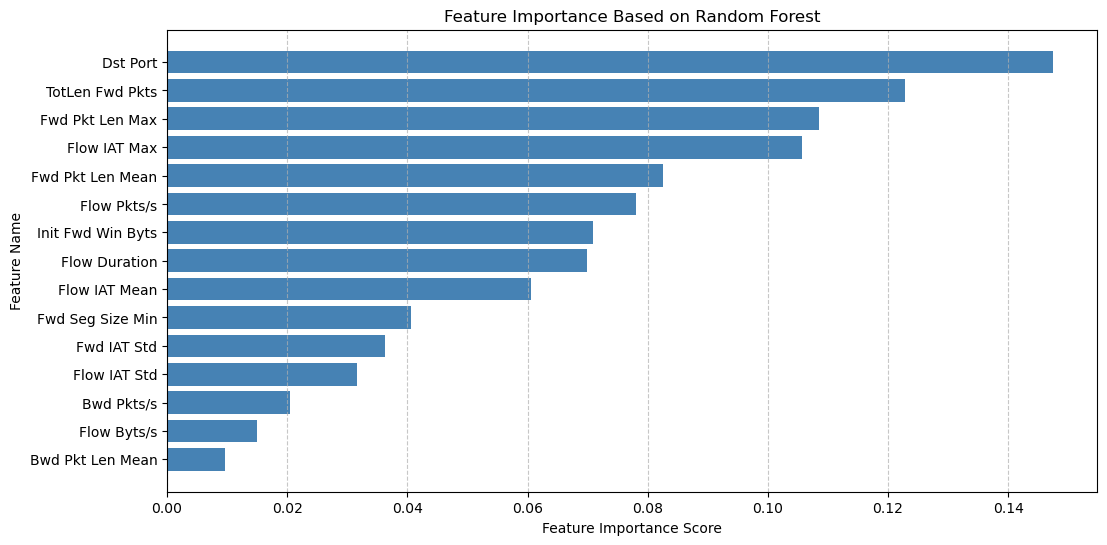

In [11]:
"""
Feature Importance Analysis Using Random Forest
- Validates the selected 15 features.
- Provides a ranked list of the most important attributes.
- Ensures reproducibility with a structured approach.
"""

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Define dataset path
DATA_PATH = r"C:\Users\S569652\Documents\INADS\data\feature_extraction_final.csv"

# Load the dataset
try:
    df = pd.read_csv(DATA_PATH)
    print(f"Dataset successfully loaded. Shape: {df.shape}")
except FileNotFoundError:
    raise FileNotFoundError(f"Error: Dataset file not found at {DATA_PATH}")

# Verify required columns
if "Label" not in df.columns:
    raise ValueError("Error: 'Label' column is missing from the dataset.")

# Separate features and labels
X = df.drop(columns=["Label"])
y = LabelEncoder().fit_transform(df["Label"])

print(f"Feature Matrix Shape: {X.shape}, Label Vector Shape: {y.shape}")

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X, y)

# Extract feature importance scores
feature_importance_df = pd.DataFrame(
    {"Feature": X.columns, "Importance": model.feature_importances_}
).sort_values(by="Importance", ascending=False)

# Display ranked feature importance
print("\nFeature Importance Ranking:")
print(feature_importance_df.to_string(index=False))

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="steelblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance Based on Random Forest")
plt.gca().invert_yaxis()  # Highest importance on top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [12]:
"""
Step: Validate Feature Selection with PCA
- Ensures that the 15 selected features explain a significant portion of variance.
- If variance retention is low, reconsider feature selection.
"""

from sklearn.decomposition import PCA

# Apply PCA on the selected 15 features
pca = PCA(n_components=15)
pca.fit(X)

# Compute total explained variance
explained_variance = pca.explained_variance_ratio_.sum()
print(f"Total Variance Explained by 15 Features: {explained_variance:.4f}")

# Decision threshold: Retaining at least 90% variance is expected.
if explained_variance > 0.90:
    print("Feature selection is validated. Proceeding with model training.")
else:
    print("Variance retention is low. Feature selection needs reassessment.")

Total Variance Explained by 15 Features: 1.0000
Feature selection is validated. Proceeding with model training.


In [13]:
"""
Step 1: Validate Dataset Before Train-Test Split
- Checks class balance to ensure a fair train-test distribution.
- Confirms no missing values or datatype mismatches.
"""

# Check label distribution
print("Class Distribution Before Splitting:")
print(df["Label"].value_counts(normalize=True) * 100)

# Check for missing values
missing_values = df.isnull().sum().sum()
if missing_values == 0:
    print("No missing values detected. Dataset is clean.")
else:
    print(f"Warning: {missing_values} missing values detected!")

# Check feature data types
print("\nFeature Data Types:")
print(df.dtypes)

Class Distribution Before Splitting:
Label
Benign                    65.813473
DDoS attacks-LOIC-HTTP    28.485229
Infilteration              3.117987
DoS attacks-GoldenEye      2.049473
DoS attacks-Slowloris      0.508475
Brute Force -Web           0.017897
Brute Force -XSS           0.007465
Name: proportion, dtype: float64
No missing values detected. Dataset is clean.

Feature Data Types:
Bwd Pkt Len Mean     float64
Flow IAT Mean        float64
Fwd Pkt Len Mean     float64
Flow IAT Std         float64
TotLen Fwd Pkts      float64
Flow Duration        float64
Bwd Pkts/s           float64
Flow Pkts/s          float64
Fwd IAT Std          float64
Flow Byts/s          float64
Fwd Pkt Len Max      float64
Flow IAT Max         float64
Init Fwd Win Byts    float64
Fwd Seg Size Min     float64
Dst Port             float64
Label                 object
dtype: object


In [14]:
"""
Step 1: Train-Test Split (Stratified)
- Ensures class balance is maintained after splitting.
"""

from sklearn.model_selection import train_test_split

# Perform stratified train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")

# Verify class distribution after split
print("\nClass Distribution in Training Set:")
print(pd.Series(y_train).value_counts(normalize=True) * 100)

print("\nClass Distribution in Testing Set:")
print(pd.Series(y_test).value_counts(normalize=True) * 100)

Training Set Shape: (1618172, 15)
Testing Set Shape: (404543, 15)

Class Distribution in Training Set:
0    65.813461
3    28.485229
6     3.117963
4     2.049473
5     0.508475
1     0.017921
2     0.007478
Name: proportion, dtype: float64

Class Distribution in Testing Set:
0    65.813523
3    28.485229
6     3.118086
4     2.049473
5     0.508475
1     0.017798
2     0.007416
Name: proportion, dtype: float64


In [16]:
# Check feature integrity
print("\nTraining Set Feature Check:")
print(X_train.dtypes)

print("\nTesting Set Feature Check:")
print(X_test.dtypes)

# Check for missing values
print("\nMissing Values in Training Set:", X_train.isnull().sum().sum())
print("Missing Values in Testing Set:", X_test.isnull().sum().sum())



Training Set Feature Check:
Bwd Pkt Len Mean     float64
Flow IAT Mean        float64
Fwd Pkt Len Mean     float64
Flow IAT Std         float64
TotLen Fwd Pkts      float64
Flow Duration        float64
Bwd Pkts/s           float64
Flow Pkts/s          float64
Fwd IAT Std          float64
Flow Byts/s          float64
Fwd Pkt Len Max      float64
Flow IAT Max         float64
Init Fwd Win Byts    float64
Fwd Seg Size Min     float64
Dst Port             float64
dtype: object

Testing Set Feature Check:
Bwd Pkt Len Mean     float64
Flow IAT Mean        float64
Fwd Pkt Len Mean     float64
Flow IAT Std         float64
TotLen Fwd Pkts      float64
Flow Duration        float64
Bwd Pkts/s           float64
Flow Pkts/s          float64
Fwd IAT Std          float64
Flow Byts/s          float64
Fwd Pkt Len Max      float64
Flow IAT Max         float64
Init Fwd Win Byts    float64
Fwd Seg Size Min     float64
Dst Port             float64
dtype: object

Missing Values in Training Set: 0
Missing Va

In [17]:
# Compare statistics of train & test sets
print("\nFeature Mean Comparison (Train vs Test):")
print(pd.DataFrame({"Train Mean": X_train.mean(), "Test Mean": X_test.mean()}))

print("\nFeature Standard Deviation Comparison (Train vs Test):")
print(pd.DataFrame({"Train Std": X_train.std(), "Test Std": X_test.std()}))



Feature Mean Comparison (Train vs Test):
                     Train Mean     Test Mean
Bwd Pkt Len Mean   1.308282e+02  1.311720e+02
Flow IAT Mean      8.449768e+06  8.465409e+06
Fwd Pkt Len Mean   3.739131e+01  3.752292e+01
Flow IAT Std       1.096791e+06  1.103210e+06
TotLen Fwd Pkts    1.930431e+03  1.619992e+03
Flow Duration      1.745886e+07  1.750780e+07
Bwd Pkts/s         3.864629e+03  3.827502e+03
Flow Pkts/s        2.389273e+04  2.435920e+04
Fwd IAT Std        1.000956e+06  1.002234e+06
Flow Byts/s        1.680158e+05  1.698749e+05
Fwd Pkt Len Max    1.504235e+02  1.509791e+02
Flow IAT Max       1.135068e+07  1.137603e+07
Init Fwd Win Byts  7.722052e+03  7.711992e+03
Fwd Seg Size Min   1.809045e+01  1.808975e+01
Dst Port           6.768279e+03  6.758090e+03

Feature Standard Deviation Comparison (Train vs Test):
                      Train Std      Test Std
Bwd Pkt Len Mean   1.763963e+02  1.768959e+02
Flow IAT Mean      2.019820e+07  2.022009e+07
Fwd Pkt Len Mean   5.659224e

In [18]:
"""
Step 1: Save Train & Test Datasets
- Saves processed training and testing sets for consistent experiments.
"""

import pandas as pd

# Convert train-test splits into DataFrames
train_df = pd.concat([pd.DataFrame(X_train, columns=X.columns), pd.DataFrame(y_train, columns=["Label"])], axis=1)
test_df = pd.concat([pd.DataFrame(X_test, columns=X.columns), pd.DataFrame(y_test, columns=["Label"])], axis=1)

# Save to CSV
train_path = r"C:\Users\S569652\Documents\INADS\data\train_set.csv"
test_path = r"C:\Users\S569652\Documents\INADS\data\test_set.csv"

train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)

print(f"Train set saved at: {train_path} | Shape: {train_df.shape}")
print(f"Test set saved at: {test_path} | Shape: {test_df.shape}")

Train set saved at: C:\Users\S569652\Documents\INADS\data\train_set.csv | Shape: (1941715, 16)
Test set saved at: C:\Users\S569652\Documents\INADS\data\test_set.csv | Shape: (727985, 16)


In [19]:
import pandas as pd

# Load the final dataset before splitting
feature_file = r"C:\Users\S569652\Documents\INADS\data\feature_extraction_final.csv"
df = pd.read_csv(feature_file)

# Check dataset shape
print("Feature Extraction Dataset Shape:", df.shape)

# Check for missing values
missing_values = df.isnull().sum()
total_missing = missing_values.sum()

print("\nTotal Missing Values Before Train-Test Split:", total_missing)
print("\nMissing Values Per Column:\n", missing_values[missing_values > 0])

Feature Extraction Dataset Shape: (2022715, 16)

Total Missing Values Before Train-Test Split: 0

Missing Values Per Column:
 Series([], dtype: int64)


In [21]:
from sklearn.model_selection import train_test_split

# Reload the original clean dataset before split
X = df.drop(columns=["Label"])
y = df["Label"]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Convert back to DataFrame for checking
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Check for missing values
print("\nMissing Values After Train-Test Split:")
print("Train Set:", train_df.isnull().sum().sum())
print("Test Set:", test_df.isnull().sum().sum())


Missing Values After Train-Test Split:
Train Set: 0
Test Set: 0


In [22]:
# Save the correctly split datasets
train_df.to_csv(r"C:\Users\S569652\Documents\INADS\data\train_set_fixed.csv", index=False)
test_df.to_csv(r"C:\Users\S569652\Documents\INADS\data\test_set_fixed.csv", index=False)

print("Train and Test sets have been successfully saved.")

Train and Test sets have been successfully saved.


In [25]:
import pandas as pd

# File paths for the fixed train and test datasets
train_path_fixed = r"C:\Users\S569652\Documents\INADS\data\train_set_fixed.csv"
test_path_fixed = r"C:\Users\S569652\Documents\INADS\data\test_set_fixed.csv"

# Load the datasets
train_df_fixed = pd.read_csv(train_path_fixed)
test_df_fixed = pd.read_csv(test_path_fixed)

# Step 1: Check dataset shapes
train_shape = train_df_fixed.shape
test_shape = test_df_fixed.shape

print("Train Dataset Shape:", train_shape)
print("Test Dataset Shape:", test_shape)

# Step 2: Check for missing values in train & test sets
missing_values_train = train_df_fixed.isnull().sum().sum()
missing_values_test = test_df_fixed.isnull().sum().sum()

print("\nMissing Values in Train Set:", missing_values_train)
print("Missing Values in Test Set:", missing_values_test)

# Step 3: Check class distribution (as percentages)
class_distribution_train = train_df_fixed["Label"].value_counts(normalize=True) * 100
class_distribution_test = test_df_fixed["Label"].value_counts(normalize=True) * 100

print("\nClass Distribution in Train Set (in %):")
print(class_distribution_train)
print("\nClass Distribution in Test Set (in %):")
print(class_distribution_test)

# Step 4: Check if the train-test split maintains similar feature statistics
train_mean_std = train_df_fixed.describe().loc[["mean", "std"]]
test_mean_std = test_df_fixed.describe().loc[["mean", "std"]]

print("\nTrain Dataset Feature Statistics (Mean and Std):")
print(train_mean_std)
print("\nTest Dataset Feature Statistics (Mean and Std):")
print(test_mean_std)

# Step 5: Verify feature consistency (data types)
train_feature_types = train_df_fixed.dtypes
test_feature_types = test_df_fixed.dtypes

print("\nTrain Dataset Feature Types:")
print(train_feature_types)
print("\nTest Dataset Feature Types:")
print(test_feature_types)

# Consolidate verification results in a dictionary
verification_results = {
    "Train Dataset Shape": train_shape,
    "Test Dataset Shape": test_shape,
    "Missing Values in Train Set": missing_values_train,
    "Missing Values in Test Set": missing_values_test,
    "Class Distribution in Train Set": class_distribution_train.to_dict(),
    "Class Distribution in Test Set": class_distribution_test.to_dict(),
    "Train Feature Types": train_feature_types.to_dict(),
    "Test Feature Types": test_feature_types.to_dict()
}

print("\nVerification Results:")
print(verification_results)

Train Dataset Shape: (1618172, 16)
Test Dataset Shape: (404543, 16)

Missing Values in Train Set: 0
Missing Values in Test Set: 0

Class Distribution in Train Set (in %):
Label
Benign                    65.813461
DDoS attacks-LOIC-HTTP    28.485229
Infilteration              3.117963
DoS attacks-GoldenEye      2.049473
DoS attacks-Slowloris      0.508475
Brute Force -Web           0.017921
Brute Force -XSS           0.007478
Name: proportion, dtype: float64

Class Distribution in Test Set (in %):
Label
Benign                    65.813523
DDoS attacks-LOIC-HTTP    28.485229
Infilteration              3.118086
DoS attacks-GoldenEye      2.049473
DoS attacks-Slowloris      0.508475
Brute Force -Web           0.017798
Brute Force -XSS           0.007416
Name: proportion, dtype: float64

Train Dataset Feature Statistics (Mean and Std):
      Bwd Pkt Len Mean  Flow IAT Mean  Fwd Pkt Len Mean  Flow IAT Std  \
mean        130.828225   8.449768e+06         37.391309  1.096791e+06   
std        

In [26]:
"""
Step 3B: SHAP Feature Importance Analysis (On a Sample)
- Uses SHAP on 10,000 samples to extract feature importance insights.
- Helps understand why our model makes certain predictions.
- Optimizes feature selection for our Global, Edge, and Device ML layers.
"""

import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = r"C:\Users\S569652\Documents\INADS\data\train_set_fixed.csv"
df = pd.read_csv(file_path)

# Sample 10,000 rows for SHAP (to prevent performance issues)
df_sample = df.sample(n=10000, random_state=42)

# Split into features (X) and labels (y)
X_sample = df_sample.drop(columns=["Label"])
y_sample = LabelEncoder().fit_transform(df_sample["Label"])  # Encode labels

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_sample, y_sample)

# Compute SHAP values
explainer = shap.Explainer(rf, X_sample)
shap_values = explainer(X_sample)

# Plot SHAP summary (Feature Importance)
shap.summary_plot(shap_values, X_sample)

100%|===================| 59996/60000 [42:59<00:00]        

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.970000, while the model output was 0.980000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [27]:
"""
Step 3C: Permutation Importance on Full Dataset
- Validates feature importance across all data.
- Helps confirm if SHAP-selected features align with real model impact.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

# Load the dataset
file_path = r"C:\Users\S569652\Documents\INADS\data\train_set_fixed.csv"
df = pd.read_csv(file_path)

# Split into features (X) and labels (y)
X = df.drop(columns=["Label"])
y = LabelEncoder().fit_transform(df["Label"])  # Encode labels

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Compute Permutation Importance
perm_importance = permutation_importance(rf, X, y, n_repeats=5, random_state=42, scoring="accuracy")

# Convert to DataFrame for visualization
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="blue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance Based on Permutation Importance")
plt.gca().invert_yaxis()
plt.show()

MemoryError: Unable to allocate 86.4 MiB for an array with shape (1618172, 1, 7) and data type float64